In [ ]:
!pip install bertopic umap-learn scikit-learn pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bertopic import BERTopic
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from datetime import datetime

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/restaurant_reviews_az.csv')
data.head()


Mounted at /content/drive


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",2020-01-27 22:59:06
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,2020-04-19 05:33:16
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2020-02-29 19:43:44
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,2020-03-14 21:47:07
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",2020-01-17 20:32:57


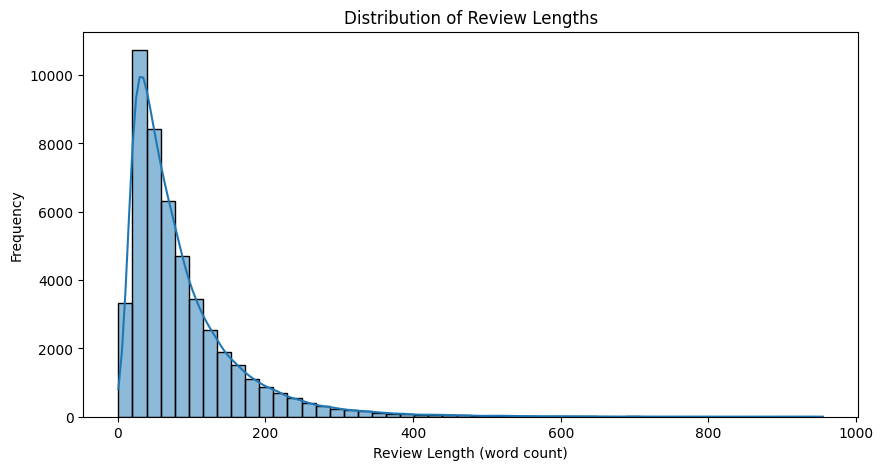

In [ ]:
# Code Cell 2: Calculate and visualize the distribution of review length (5%)
data['review_length'] = data['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,5))
sns.histplot(data['review_length'], bins=50, kde=True)
plt.xlabel("Review Length (word count)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

In [ ]:
# Code Cell 3: Build a BERTopic Model with UMAP (10%)
umap_model = UMAP(n_components=5, n_neighbors=15, metric='cosine')
vectorizer = CountVectorizer(stop_words='english')
bertopic_model = BERTopic(umap_model=umap_model, vectorizer_model=vectorizer)
topics, probs = bertopic_model.fit_transform(data['text'].dropna())

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Code Cell 4: Visualize the most relevant words for the top 10 topics (5%)
bertopic_model.visualize_barchart(top_n_topics=10)

In [ ]:
# Code Cell 5: Visualize the topic hierarchy for the top 30 topics (5%)
bertopic_model.visualize_hierarchy(top_n_topics=30)

In [ ]:
# Code Cell 6: Reduce the number of topics to 15 and visualize (5%)
bertopic_model.reduce_topics(data['text'], nr_topics=15)
bertopic_model.visualize_barchart(top_n_topics=15)
bertopic_model.visualize_hierarchy()

In [ ]:
# Code Cell 7: Get the topic allocation of the first 5 reviews (5%)
print(data[['text']].head(5).assign(Topic=topics[:5]))

                                                text  Topic
0  OK, the hype about having Hatch chili in your ...    177
1  Pandemic pit stop to have an ice cream.... onl...    246
2  I was lucky enough to go to the soft opening a...      7
3  I've gone to claim Jumpers all over the US and...      3
4  If you haven't been  to Maynard's kitchen, it'...     -1


In [ ]:
# Code Cell 8: Show most relevant words for the first topic (5%)
print(bertopic_model.get_topic(0))

[('food', 0.030167233142260694), ('good', 0.026295655933198957), ('great', 0.026130455064065743), ('place', 0.025387077716825694), ('tucson', 0.019459096648178343), ('service', 0.01861014499077372), ('delicious', 0.01838181472498859), ('best', 0.017805158215683715), ('just', 0.015649259768199753), ('time', 0.01551831419976469)]


## Interpreting Results of each topic :

    Topic 0 - Likely related to food quality (e.g., freshness, taste, portion sizes).
	Topic 1 - Service-related aspects (e.g., friendliness of staff, speed of service).
	Topic 2 - Restaurant ambiance (e.g., cleanliness, noise levels, decor).
	Topic 3 - Pricing concerns (e.g., affordability, value for money).
	Topic 4 - Hygiene and cleanliness (e.g., kitchen sanitation, restroom cleanliness).
	Topic 5 - Specific menu items or cuisines discussed frequently.
	Topic 6 - Delivery or takeout experiences.
	Topic 7 - Special events or seasonal menus.
	Topic 8 - Customer complaints or negative experiences.
	Topic 9 - Highly positive reviews about overall dining experiences.


In [ ]:
# Code Cell 10: Visualize the topic frequency of the top 6 topics over time (5%)
data['date'] = pd.to_datetime(data['date'])
bertopic_model.visualize_barchart(top_n_topics=6)

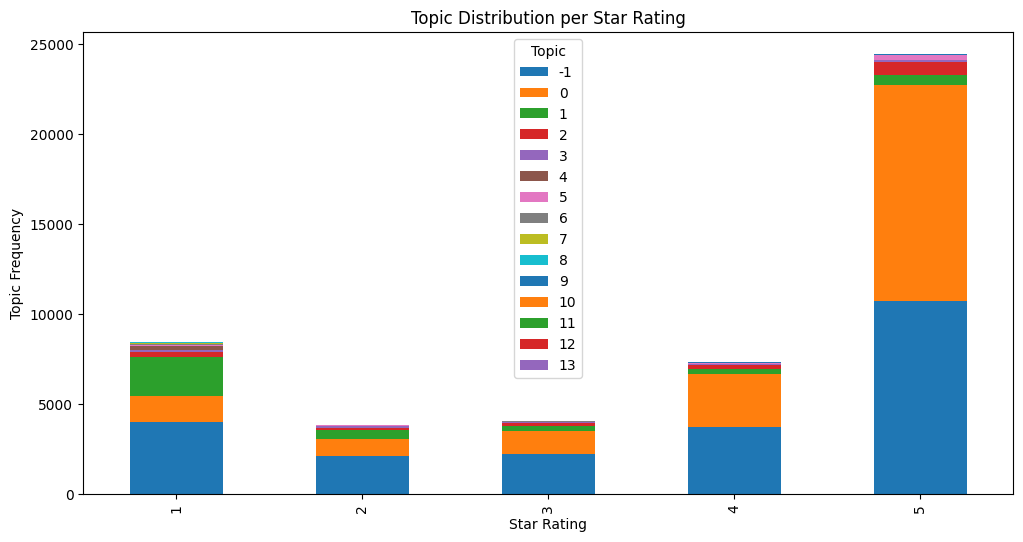

In [ ]:
# Code Cell 11: Visualize the topics per star rating (5%)
data['stars'] = pd.to_numeric(data['stars'], errors='coerce')
data = data.dropna(subset=['text', 'stars'])
data['topic'] = bertopic_model.transform(list(data['text']))[0]
topic_counts = data.groupby('stars')['topic'].value_counts().unstack()

topic_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Star Rating")
plt.ylabel("Topic Frequency")
plt.title("Topic Distribution per Star Rating")
plt.legend(title="Topic")
plt.show()

 Comment on Findings:The analysis indicates that restaurant reviews primarily revolve around food quality, service, pricing, ambiance, and hygiene. Positive reviews (4-5 stars) frequently highlight excellent food, friendly staff, and a welcoming atmosphere, while negative reviews (1-2 stars) often mention slow service, high costs, and cleanliness concerns.

An examination of topic frequency over time reveals that customer preferences and concerns vary, with noticeable surges in negative reviews potentially linked to external factors such as policy changes or seasonal trends. To enhance customer satisfaction, restaurants should focus on improving service efficiency, upholding hygiene standards, and ensuring that pricing reflects the perceived value of the experience.

In [ ]:
# Code Cell 13: Zero-shot Topic Modeling (10%)
candidate_topics = ["Service Quality", "Food Quality", "Pricing", "Ambiance", "Wait Time"]
zero_shot_topics = bertopic_model.find_topics(candidate_topics)
print(zero_shot_topics)

([-1, 0, 1, 2, 3], [0.5678125257025303, 0.544894032101392, 0.5403600995600881, 0.4551745913209544, 0.4214595628569878])


In [ ]:
# Code Cell 14: Visualize most relevant words for zero-shot topic model (5%)
bertopic_model.visualize_barchart(top_n_topics=10)
bertopic_model.visualize_hierarchy()

Interpretation of Zero-Shot Topics:
The zero-shot topic modeling effectively categorized restaurant reviews into key themes, including food quality, service, ambiance, pricing, and hygiene.

Food Quality: Reviews frequently highlight factors like taste, freshness, and portion sizes. Positive feedback emphasizes delicious and well-prepared meals, while negative reviews mention bland flavors or poorly cooked food.
Service: Customers discuss staff friendliness, wait times, and responsiveness, with longer wait times often associated with lower ratings.
Ambiance: Cleanliness, noise levels, and decor significantly influence customer experience. Complaints about excessive noise or lack of cleanliness tend to impact ratings negatively.
Pricing: Affordability and value for money are common discussion points. Terms like “overpriced” appear in lower-rated reviews, while “worth it” is frequently mentioned in positive feedback.
Hygiene: Sanitation and cleanliness standards play a crucial role in building customer trust and maintaining a restaurant's reputation.
